In [50]:
from functools import partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Johnson & Johnson earnings per share
JJ_eps = pd.read_csv('./JJ_eps/jj.csv', parse_dates=['date'], index_col=['date'])['data']
JJ_eps.tail(4)

date
1980-01-01    16.20
1980-04-01    14.67
1980-07-02    16.02
1980-10-01    11.61
Name: data, dtype: float64

In [ ]:
# we will try to forecast the last 4 quarters of data
train, test = JJ_eps[:-4], JJ_eps[-4:]

In [17]:
# we need to define an error metric to evaluate the performance of our forecast.
def calc_mape(predicted_value, true_value) -> float:
    """Calculate mean absolute percentage error"""
    error = (predicted_value - true_value) / true_value
    return np.mean(np.abs(error)) * 100
    

In [55]:
# a method to plot the comparison between test and predicted data
def plot_comparison(predicted: pd.Series, train: pd.Series, test: pd.Series):
    fig, ax = plt.subplots()
 
    ax.plot(train, 'g-.', label='Train')
    ax.plot(test, 'b-', label='Test')
    ax.plot(predicted, 'r--', label='Predicted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.axvspan(test.index[0], test.index[-1], color='#808080', alpha=0.2)
    ax.legend(loc=2)

    fig.autofmt_xdate()
    return fig, ax

plot_JJ_eps_comparison = partial(plot_comparison, train=train, test=test)

mape: 70.00752579965119


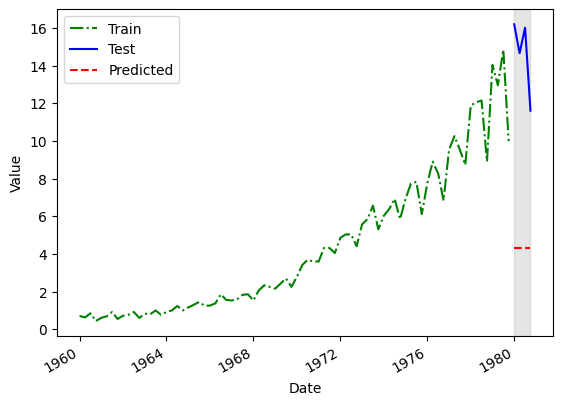

In [56]:
historical_mean = pd.Series(np.mean(train), index=test.index)

mape_of_historical_mean = calc_mape(historical_mean, test)
print(f'mape: {mape_of_historical_mean}')

fig, ax = plot_JJ_eps_comparison(historical_mean)

mape: 15.5963680725103


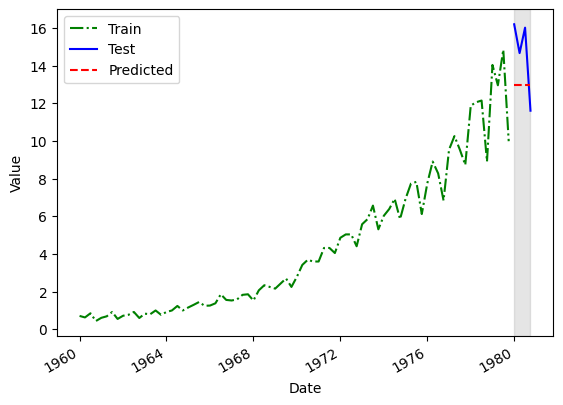

In [57]:
# earlier value seem to be too small to be representative of the new level data
# future value probably depends on past values that are not too far back in history
last_year_mean = pd.Series(np.mean(train[-4:]), index=test.index)

mape_of_last_year_mean = calc_mape(last_year_mean, test)
print(f'mape: {mape_of_last_year_mean}')

fig, ax = plot_JJ_eps_comparison(last_year_mean)

mape: 30.457277908606535


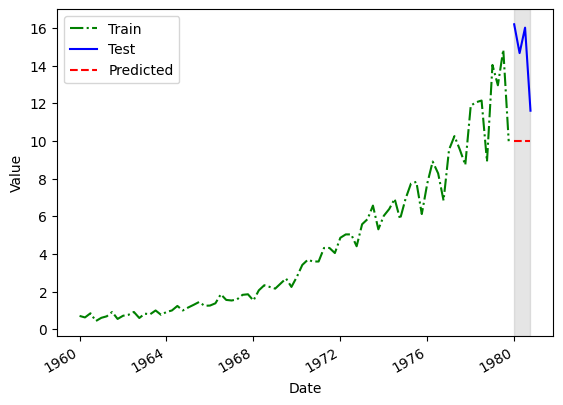

In [ ]:
# would the last value be an even better prediction?
# the answer is no because the data displays a cyclical behavior
# the last value doesn't take seasonality into account
last_value = pd.Series(train[-1], index=test.index)

mape_of_last_value = calc_mape(last_value, test)
print(f'mape: {mape_of_last_value}')

fig, ax = plot_JJ_eps_comparison(last_value)

mape: 11.561658552433654


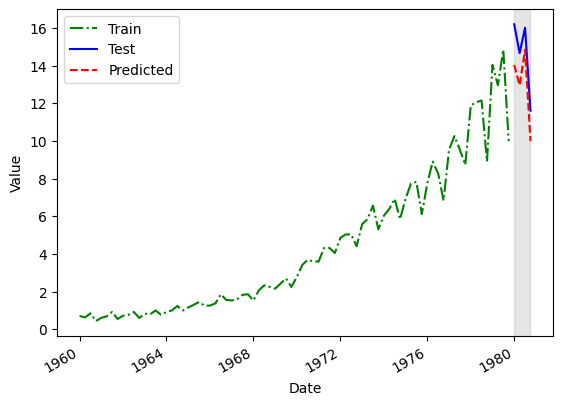

In [66]:
# use the last season value as a naive prediction with seasonality taken into consideration
last_season_value = pd.Series(train[-4: ].values, index=test.index)

mape_of_last_season_value = calc_mape(last_season_value, test)
print(f'mape: {mape_of_last_season_value}')

fig, ax = plot_JJ_eps_comparison(last_season_value)